In [1]:
import pickle
import pandas as pd
import lightgbm as lgb

In [28]:
model_file = "/Users/frjofre/Documents/EyF/dmeyf2025/models_zlgbm-baseline_c10_gbzlgbm-baseline_s0.1_uFalse_537919.pkl"
intra_month_model_file = "/Users/frjofre/Documents/EyF/dmeyf2025/models_zlgbm-intramonth_c10_gbzlgbm-intramonth_s0.1_uFalse_537919.pkl"
rf_baseline_model_file = "/Users/frjofre/Documents/EyF/dmeyf2025/models_zlgbm-baseline-RF_c10_gbzlgbm-baseline-RF_s0.1_uFalse_537919.pkl"

In [29]:
# Load the LightGBM model from the pickle file
with open(rf_baseline_model_file, 'rb') as f:
    lgbm_model = pickle.load(f)


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

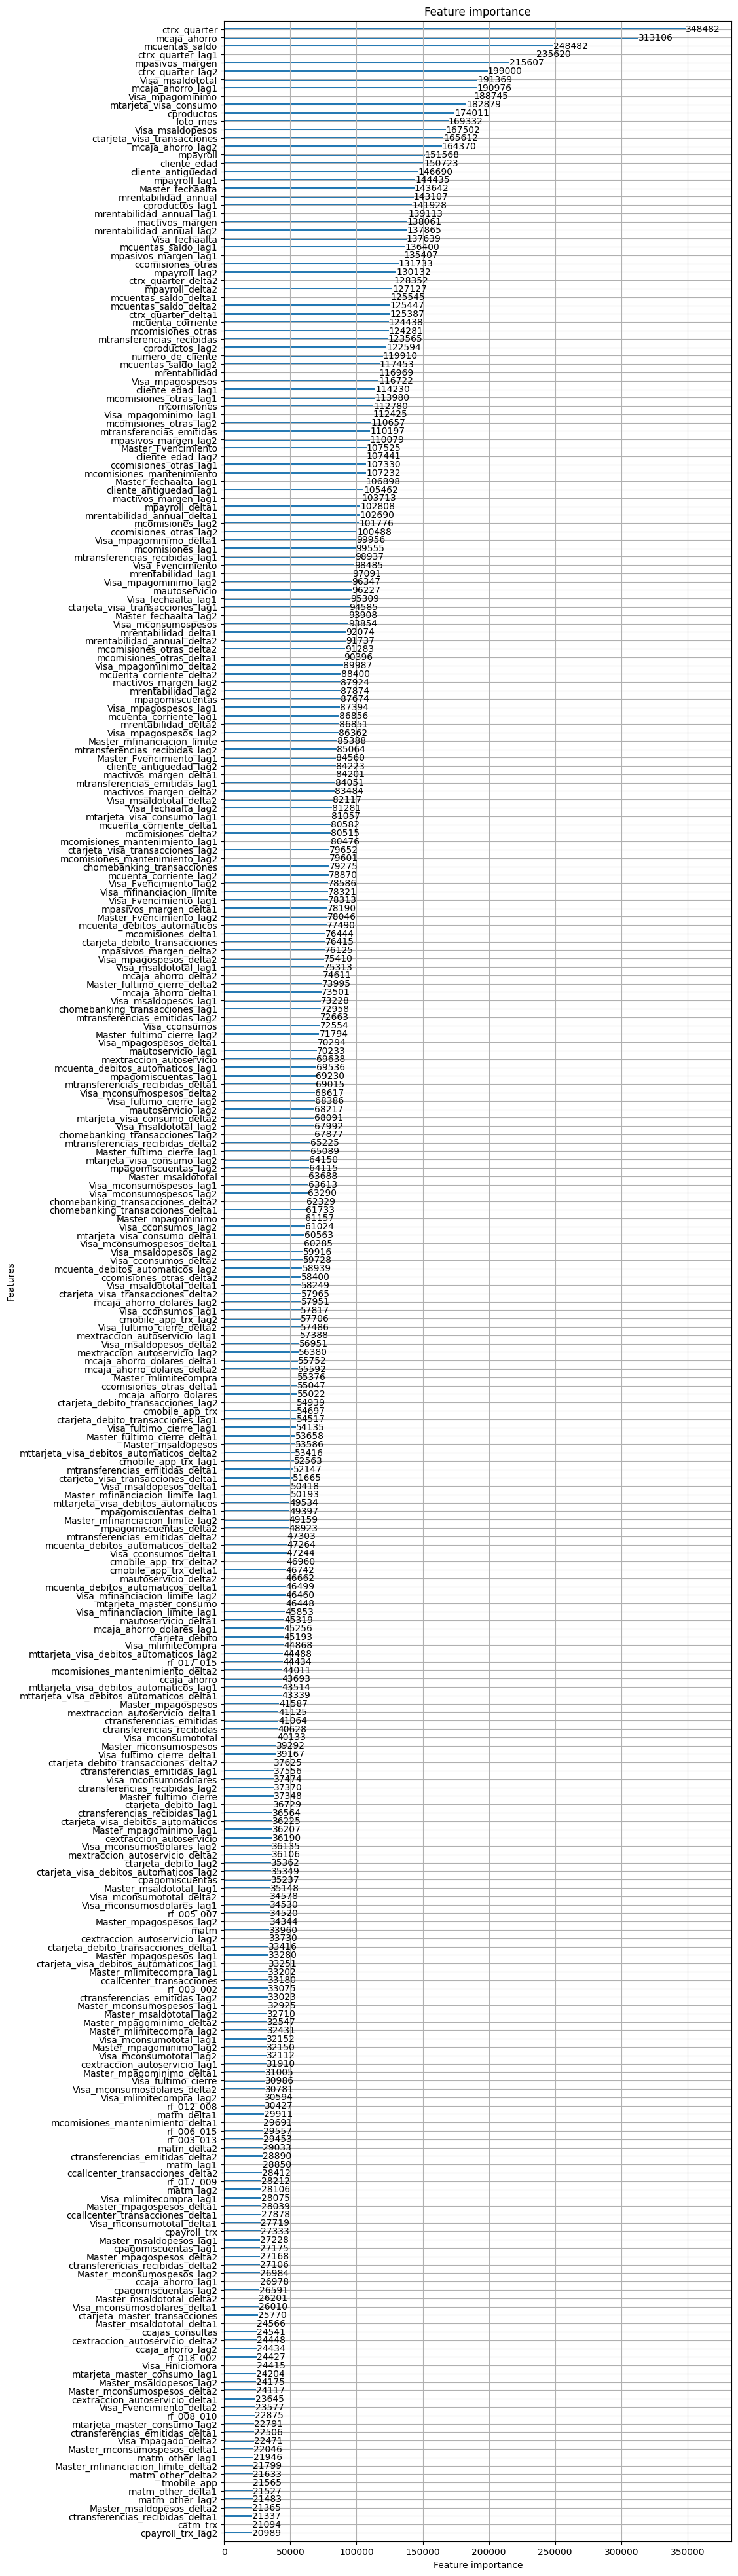

In [32]:
lgb.plot_importance(lgbm_model, figsize=(10, 50), max_num_features=300)

In [33]:
# Find the position (rank) of the feature 'cprestamos_hipotecarios' by importance for a LightGBM Booster
importances = lgbm_model.feature_importance()
features = lgbm_model.feature_name()
importances_df = pd.DataFrame({'feature': features, 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False).reset_index(drop=True)

feature_name = 'numero_de_cliente'

if feature_name in importances_df['feature'].values:
    position = importances_df[importances_df['feature'] == feature_name].index[0] + 1  # 1-based position
    print(f"La posición de la feature '{feature_name}' (por importancia) es: {position}")
else:
    print(f"La feature '{feature_name}' no está en el modelo.")



La posición de la feature 'numero_de_cliente' (por importancia) es: 40
